### 特征提取（三）——寻找几何中心

**好像是用到矩的知识——图像的矩可以帮助我们计算图像的质心，面积等。**

https://zhuanlan.zhihu.com/p/38739563

**然后我现在试着参考这边文章，进行边缘检测，框出物体的轮廓**

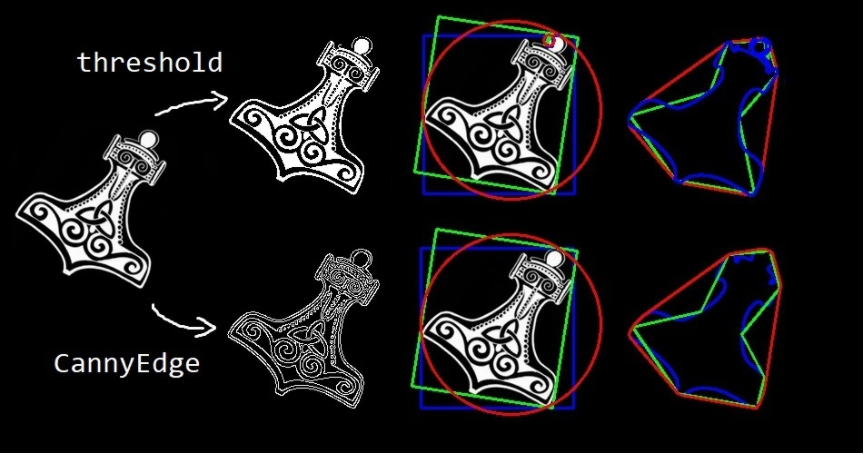

边缘检测、边缘探测、轮廓绘制、多边形、区域分割、edge_detection、object_segmentation，

使用opencv-python的函数cv2.findContours()，框出物体的轮廓

（关键词↑）

图片处理效果预览↑（就是封面图片），从左到右依次是：

原图

阈值图（第一行）、Canny边缘提取（第二行）

蓝色矩形、绿色最小矩形、红色最小圆形

蓝色等高线轮廓、绿色贴合轮廓、红色包围轮廓


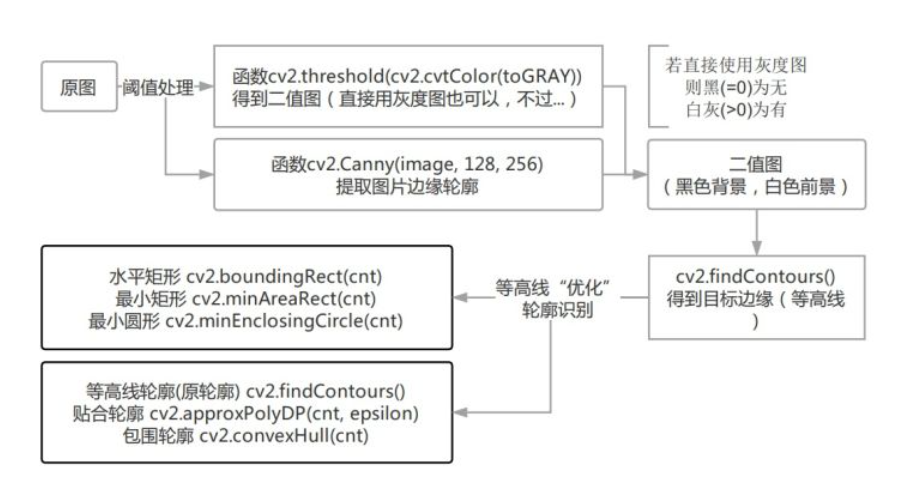

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def draw_contours(img, cnts):  # conts = contours
    img = np.copy(img)
    img = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)
    return img


In [4]:
def draw_min_rect_circle(img, cnts):  # conts = contours
    img = np.copy(img)

    for cnt in cnts:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # blue

        min_rect = cv2.minAreaRect(cnt)  # min_area_rectangle
        min_rect = np.int0(cv2.boxPoints(min_rect))
        cv2.drawContours(img, [min_rect], 0, (0, 255, 0), 2)  # green

        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center, radius = (int(x), int(y)), int(radius)  # center and radius of minimum enclosing circle
        img = cv2.circle(img, center, radius, (0, 0, 255), 2)  # red
    return img

In [5]:
def draw_approx_hull_polygon(img, cnts):
    # img = np.copy(img)
    img = np.zeros(img.shape, dtype=np.uint8)

    cv2.drawContours(img, cnts, -1, (255, 0, 0), 2)  # blue

    min_side_len = img.shape[0] / 32  # 多边形边长的最小值 the minimum side length of polygon
    min_poly_len = img.shape[0] / 16  # 多边形周长的最小值 the minimum round length of polygon
    min_side_num = 3  # 多边形边数的最小值
    approxs = [cv2.approxPolyDP(cnt, min_side_len, True) for cnt in cnts]  # 以最小边长为限制画出多边形
    approxs = [approx for approx in approxs if cv2.arcLength(approx, True) > min_poly_len]  # 筛选出周长大于 min_poly_len 的多边形
    approxs = [approx for approx in approxs if len(approx) > min_side_num]  # 筛选出边长数大于 min_side_num 的多边形
    # Above codes are written separately for the convenience of presentation.
    cv2.polylines(img, approxs, True, (0, 255, 0), 2)  # green

    hulls = [cv2.convexHull(cnt) for cnt in cnts]
    cv2.polylines(img, hulls, True, (0, 0, 255), 2)  # red

    # for cnt in cnts:
    #     cv2.drawContours(img, [cnt, ], -1, (255, 0, 0), 2)  # blue
    #
    #     epsilon = 0.02 * cv2.arcLength(cnt, True)
    #     approx = cv2.approxPolyDP(cnt, epsilon, True)
    #     cv2.polylines(img, [approx, ], True, (0, 255, 0), 2)  # green
    #
    #     hull = cv2.convexHull(cnt)
    #     cv2.polylines(img, [hull, ], True, (0, 0, 255), 2)  # red
    return img

In [6]:
image = cv2.imread('good_segemation.jpg')  # a black objects on white image is better

# gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
thresh = cv2.Canny(image, 128, 256)

thresh,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgs = [
    image, thresh,
    draw_min_rect_circle(image, contours),
    draw_approx_hull_polygon(image, contours),
]


In [16]:
draw_min_rect_circle(image, contours)

cv2.imwrite("lk.jpg",image)

True

In [17]:
draw_approx_hull_polygon(image, contours)
cv2.imwrite("lk2.jpg",image)

True

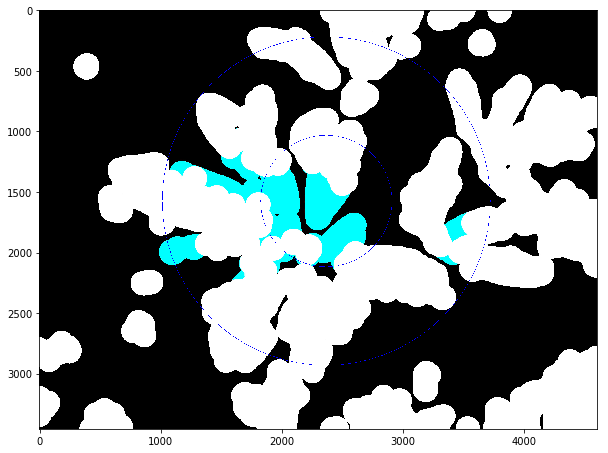

In [32]:
img = cv2.imread('lunkuo.jpg')
thresh = cv2.Canny(image, 128, 256)

thresh,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

list_center=[]
list_radius=[]
for cnt in contours:
    #x, y, w, h = cv2.boundingRect(cnt)
    #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # blue

    #min_rect = cv2.minAreaRect(cnt)  # min_area_rectangle
    #min_rect = np.int0(cv2.boxPoints(min_rect))
    #cv2.drawContours(img, [min_rect], 0, (0, 255, 0), 2)  # green

    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center, radius = (int(x), int(y)), int(radius)  # center and radius of minimum enclosing circle
    list_radius.append(radius)
    list_center.append(center)
    
radius_max_index = list_radius.index(max(list_radius))
radius_max = list_radius[radius_max_index]
center = list_center[radius_max_index]
img = cv2.circle(img, center, radius_max, (0, 0, 255), 2)  # red

radius_predict=int(0.4*radius_max)

img = cv2.circle(img, center, radius_predict, (0, 0, 255), 2)  # red

cv2.imwrite("lk.jpg",img)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(img)


In [33]:
image = cv2.imread('good_segemation.jpg') 
ret1, thresh1 = cv2.threshold(image,255, 255, cv2.THRESH_BINARY)


In [36]:
thresh1 = cv2.circle(thresh1, center, radius_predict, (255, 255, 255), -1)

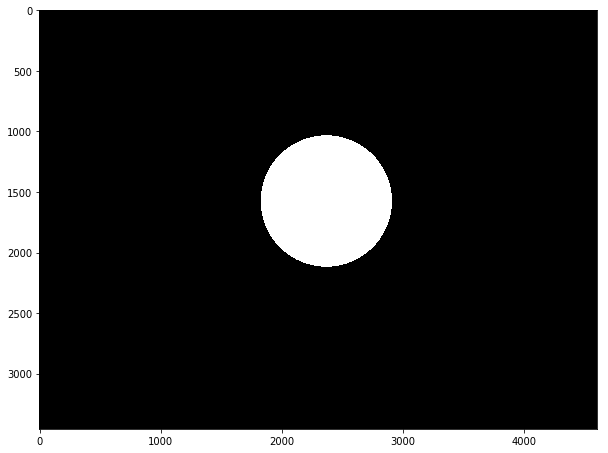

In [37]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(thresh1)

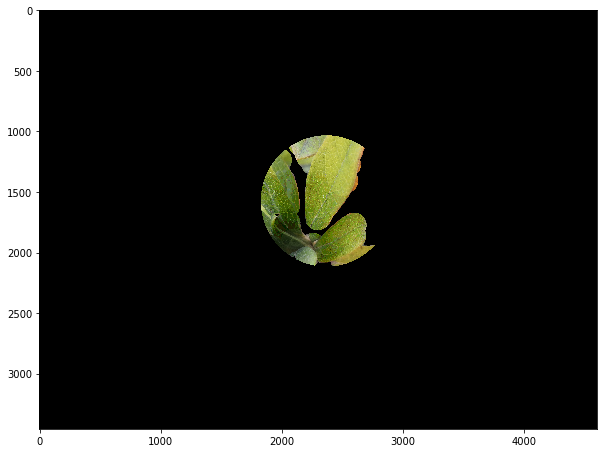

In [39]:
#(五)分离颜色通道&多通道图像混合
import cv2
'''
cv2.split(m, mv):将一个多通道数组分离成几个单通道数组
m：我们需要进行分离的多通道数组
mv：函数的输出数组或者输出的vector容器
'''
import  argparse
import numpy as np

img = cv2.imread('good_segemation.jpg')

(B,G,R) = cv2.split(img)#之前得到的图

mask=cv2.cvtColor(thresh1,cv2.COLOR_BGR2GRAY)

and_img_B = cv2.bitwise_and(B,mask)
and_img_G = cv2.bitwise_and(G,mask)
and_img_R = cv2.bitwise_and(R,mask)

zeros = np.zeros(image.shape[:2], np.uint8)

img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(img_RGB)
#plt.imshow(cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB))

In [44]:
cv2.imwrite("circle.jpg",img_RGB)

True

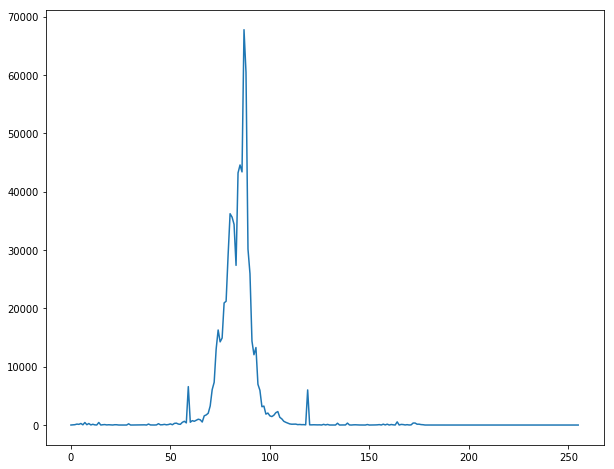

In [43]:
img_HSV=cv2.cvtColor(img_RGB, cv2.COLOR_BGR2HSV)

hue_hist = cv2.calcHist([img_HSV], [0], None, [256], [1, 256])

plt.plot(hue_hist)
plt.show()

69789.0 87


(Text(0.5,1,'OResult'), (-0.5, 4607.5, 3455.5, -0.5))

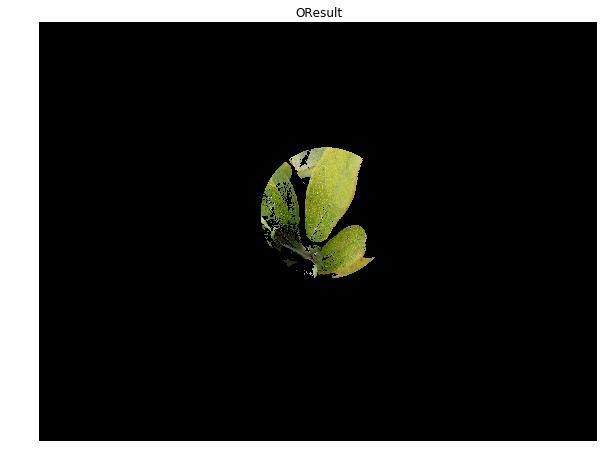

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('circle.jpg')

#Convert to HSV space
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue = HSV_img[:, :, 0]

#select maximum value of H component from histogram
hist = cv2.calcHist([hue],[0],None,[256],[0,256])
hist= hist[1:, :] #suppress black value
elem = np.argmax(hist)
print (np.max(hist), np.argmax(hist))


lower_gray = np.array([78, 0,0])
upper_gray = np.array([99,255,255])
# Threshold the image to get only selected
mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(img,img, mask= mask)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(res2)
plt.title('OResult'),plt.axis('off')